In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt



In [2]:
df  = pd.read_excel('Online Retail.xlsx')
df

KeyboardInterrupt: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [ ]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [ ]:
df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ANT SILVER TURQUOISE BOUDICCA RING       1
Damages                                  1
Found by jackie                          1
water damaged                            1
lost in space                            1
Name: count, Length: 4223, dtype: int64

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
# Drop missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Remove negative/zero quantities
df = df[df['Quantity'] > 0]

# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

/tmp/ipykernel_5222/1864896308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'MonetaryValue'}, inplace=True)
rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,397924.0,13.021823,1.0,2.0,6.0,12.0,80995.0,180.42021
InvoiceDate,397924,2011-07-10 23:43:36.912475648,2010-12-01 08:26:00,2011-04-07 11:12:00,2011-07-31 14:39:00,2011-10-20 14:33:00,2011-12-09 12:50:00,NaN
UnitPrice,397924.0,3.116174,0.0,1.25,1.95,3.75,8142.75,22.096788
CustomerID,397924.0,15294.315171,12346.0,13969.0,15159.0,16795.0,18287.0,1713.169877
TotalPrice,397924.0,22.394749,0.0,4.68,11.8,19.8,168469.6,309.055588


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [ ]:
df.isnull().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

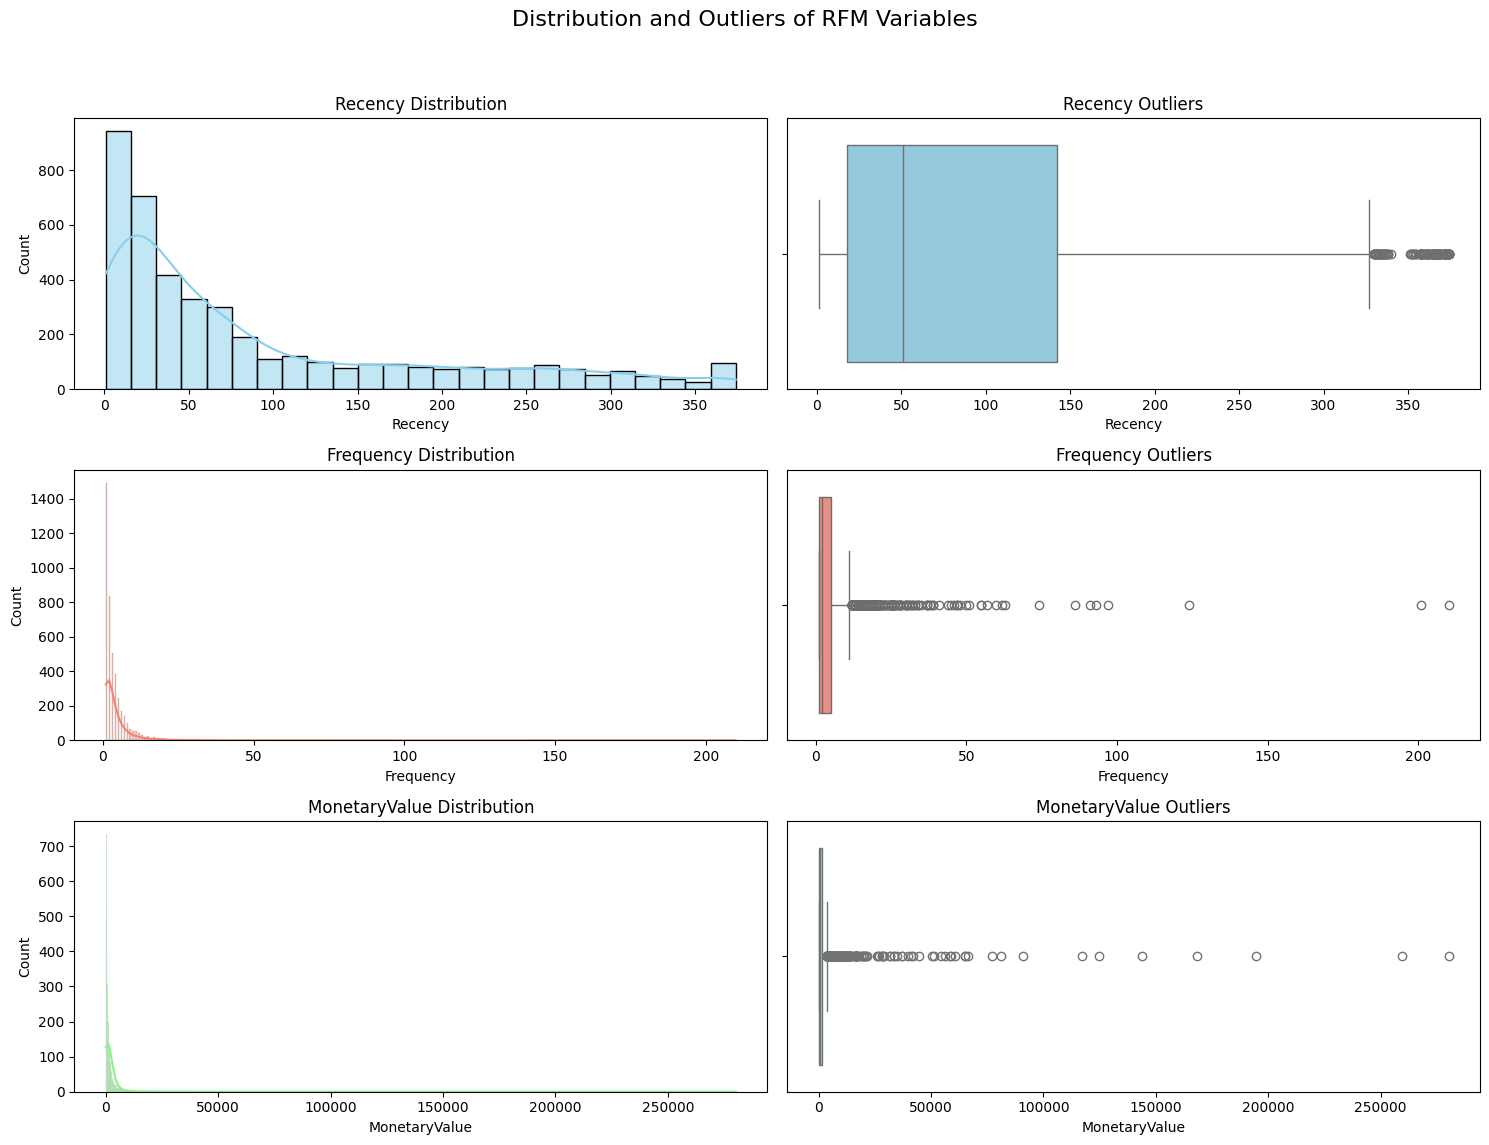

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribution and Outliers of RFM Variables', fontsize=16)

# Loop through columns to create Histograms (Distribution) and Boxplots (Outliers)
features = ['Recency', 'Frequency', 'MonetaryValue']
colors = ['skyblue', 'salmon', 'lightgreen']

for i, col in enumerate(features):
    # Histogram (Distribution)
    sns.histplot(rfm[col], kde=True, ax=axes[i, 0], color=colors[i])
    axes[i, 0].set_title(f'{col} Distribution')
    
    # Boxplot (Outliers)
    sns.boxplot(x=rfm[col], ax=axes[i, 1], color=colors[i])
    axes[i, 1].set_title(f'{col} Outliers')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# 1. Calculate IQR
# We use double brackets [['...']] to select the columns
cols = ['MonetaryValue', 'Frequency', 'Recency']
Q1 = rfm[cols].quantile(0.25)
Q3 = rfm[cols].quantile(0.75)
IQR = Q3 - Q1

# 2. Define Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Create the Filter
# This checks if values are within range for ALL columns (axis=1)
condition = ((rfm[cols] >= lower_bound) & (rfm[cols] <= upper_bound)).all(axis=1)

# 4. Apply the Filter
rfm_cleaned = rfm[condition]

print(f"Original shape: {rfm.shape}")
print(f"New shape: {rfm_cleaned.shape}")

Original shape: (4339, 4)
New shape: (3711, 4)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# 1. APPLY LOG TRANSFORMATION
# np.log1p adds 1 to avoid "log(0)" errors. 
# This pulls extreme outliers closer to the average.
rfm_log = np.log1p(rfm[['Recency', 'Frequency', 'MonetaryValue']])

# 2. RE-SCALE THE LOG DATA
scaler = StandardScaler()
rfm_scaled_log = scaler.fit_transform(rfm_log)

# 3. RE-RUN AGGLOMERATIVE CLUSTERING (Try K=4 again)
agg_model = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_labels_log = agg_model.fit_predict(rfm_scaled_log)

# 4. CHECK THE COUNTS AGAIN
print("--- Counts After Log Transformation (K=4) ---")
print(pd.Series(agg_labels_log).value_counts().sort_index())

--- Counts After Log Transformation (K=4) ---
0     842
1    1010
2    1468
3    1019
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'MonetaryValue']])

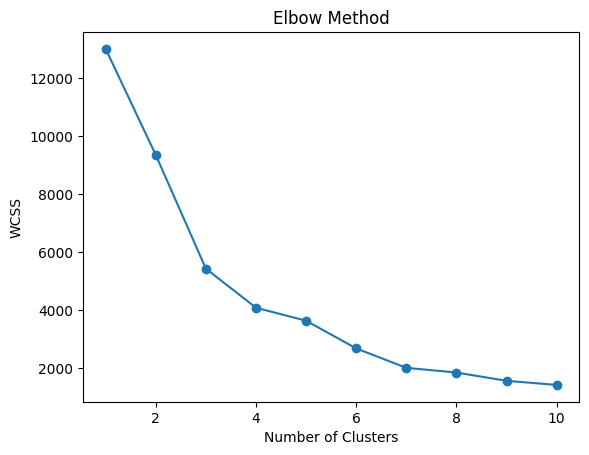

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled)
kmeans_score = silhouette_score(rfm_scaled, kmeans_labels)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
agg = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_labels = agg.fit_predict(rfm_scaled)
agg_score = silhouette_score(rfm_scaled, agg_labels)

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(rfm_scaled)
gmm_score = silhouette_score(rfm_scaled, gmm_labels)


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(rfm_scaled)
dbscan_score = silhouette_score(rfm_scaled, dbscan_labels)

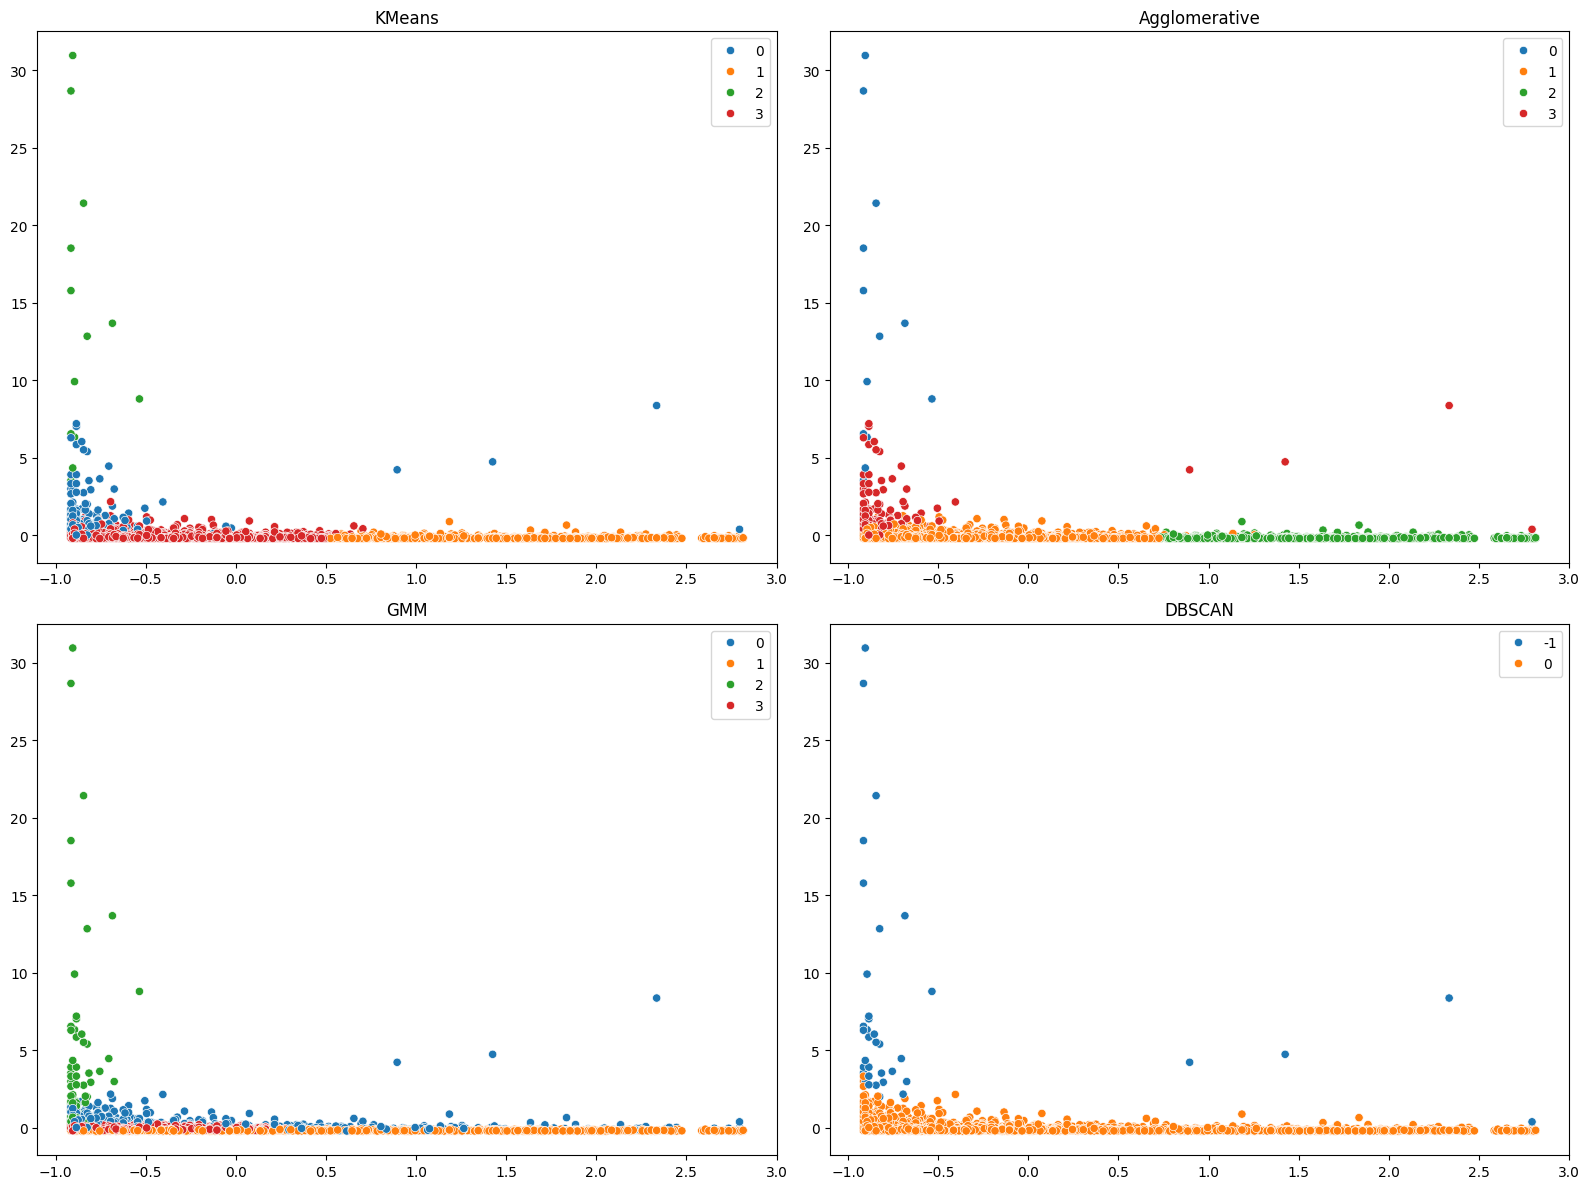

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
models = [('KMeans', kmeans_labels), ('Agglomerative', agg_labels), 
          ('GMM', gmm_labels), ('DBSCAN', dbscan_labels)]

for ax, (name, labels) in zip(axs.flat, models):
    sns.scatterplot(x=rfm_scaled[:,0], y=rfm_scaled[:,2], hue=labels, palette='tab10', ax=ax)
    ax.set_title(name)

plt.tight_layout()
plt.show()

In [ ]:
print(f"KMeans Silhouette Score      : {kmeans_score:.3f}")
print(f"Agglomerative Silhouette Score: {agg_score:.3f}")
print(f"GMM Silhouette Score         : {gmm_score:.3f}")
print(f"DBSCAN Silhouette Score      : {dbscan_score:.3f}")

KMeans Silhouette Score      : 0.616
Agglomerative Silhouette Score: 0.615
GMM Silhouette Score         : 0.163
DBSCAN Silhouette Score      : 0.863


Tuning Hyperparameters... (This may take a moment)


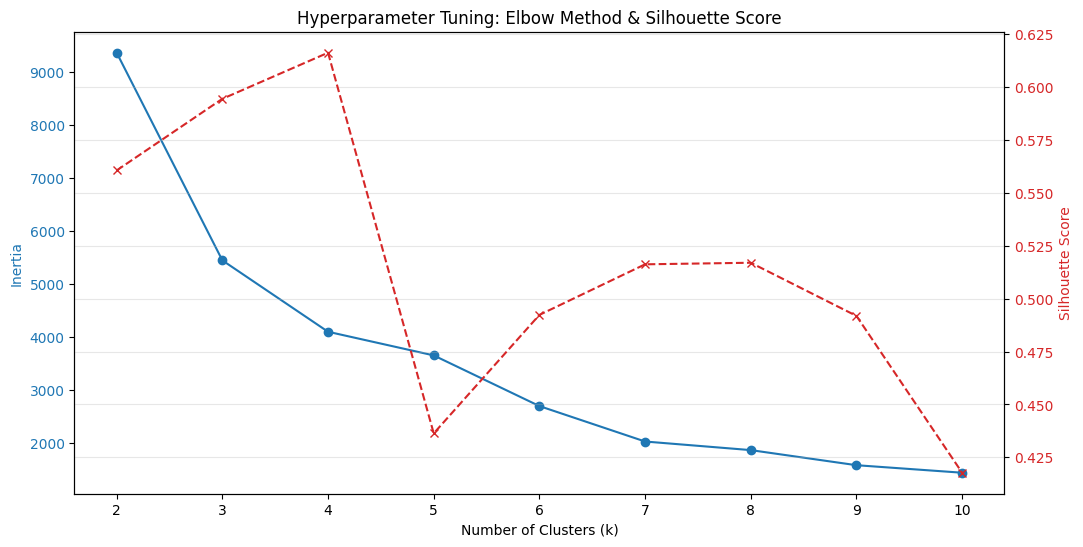

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Test k from 2 to 10

print("Tuning Hyperparameters... (This may take a moment)")

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Inertia (Elbow Method)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='tab:blue')
ax1.plot(K_range, inertia, marker='o', color='tab:blue', label='Inertia')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot Silhouette Score
ax2 = ax1.twinx()  
ax2.set_ylabel('Silhouette Score', color='tab:red')
ax2.plot(K_range, silhouette_scores, marker='x', color='tab:red', linestyle='--', label='Silhouette')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Hyperparameter Tuning: Elbow Method & Silhouette Score')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import pandas as pd

# Create a dataframe with all labels
results = pd.DataFrame({
    'KMeans': kmeans_labels,
    'Agglomerative': agg_labels,
    'GMM': gmm_labels,
    'DBSCAN': dbscan_labels
})

# Print the count of customers in each cluster
print("--- Customer Counts per Model ---")
for col in results.columns:
    print(f"\nModel: {col}")
    print(results[col].value_counts().sort_index())

--- Customer Counts per Model ---

Model: KMeans
KMeans
0     211
1    1062
2      13
3    3053
Name: count, dtype: int64

Model: Agglomerative
Agglomerative
0      15
1    3200
2     949
3     175
Name: count, dtype: int64

Model: GMM
GMM
0     481
1    2154
2      79
3    1625
Name: count, dtype: int64

Model: DBSCAN
DBSCAN
-1      41
 0    4298
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Assign the Agglomerative labels to your original RFM dataframe
# (Ensure 'rfm' is your original dataframe, not the scaled one)
rfm['Cluster'] = agg_labels 

# 2. Calculate the average R, F, M for each cluster
# We also add 'count' to see how many customers are in each group
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'CustomerID': 'count'
}).round(2)

print("--- Cluster Profiles (Averages) ---")
display(cluster_summary)

--- Cluster Profiles (Averages) ---


,Recency,Frequency,MonetaryValue,CustomerID
Cluster,,,,
0,6.73,83.60,111916.31,15
1,47.62,3.72,1357.66,3200
2,259.54,1.49,457.31,949
3,15.05,22.57,14023.83,175


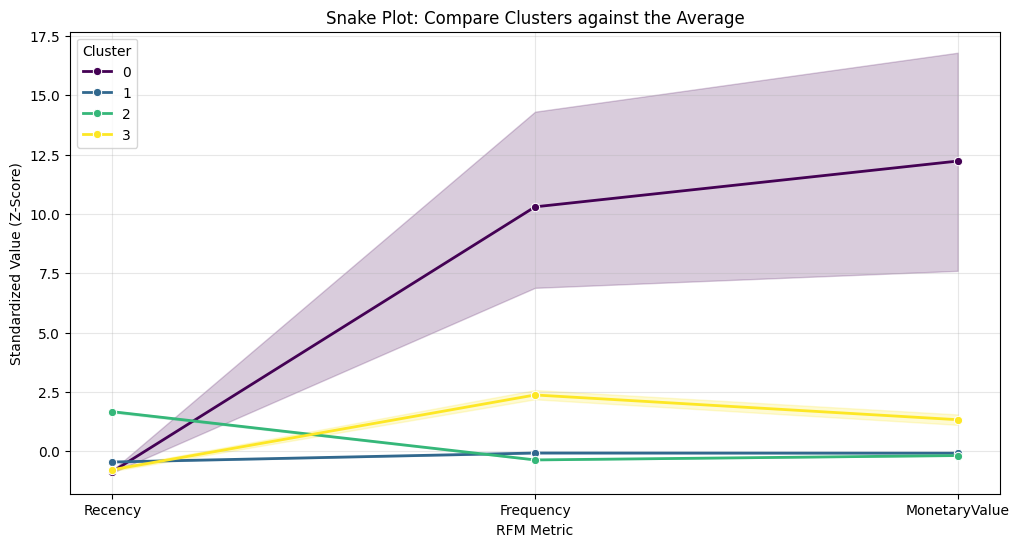

In [ ]:
# 1. Prepare the DataFrame (ensure CustomerID is the index name)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm.index, columns=['Recency', 'Frequency', 'MonetaryValue'])
rfm_scaled_df['Cluster'] = agg_labels

# FORCE the index to be named 'CustomerID' so reset_index() creates that column
rfm_scaled_df.index.name = 'CustomerID'

# 2. Melt the data (Now 'CustomerID' will exist after reset_index)
rfm_melted = pd.melt(
    rfm_scaled_df.reset_index(), 
    id_vars=['CustomerID', 'Cluster'],
    value_vars=['Recency', 'Frequency', 'MonetaryValue'],
    var_name='Metric',
    value_name='Value'
)

# 3. Create the Snake Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Metric', y='Value', hue='Cluster', data=rfm_melted, palette='viridis', marker='o', linewidth=2)

plt.title('Snake Plot: Compare Clusters against the Average')
plt.xlabel('RFM Metric')
plt.ylabel('Standardized Value (Z-Score)')
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
import optuna
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def objective(trial):
    # 1. Define the Search Space
    n_clusters = trial.suggest_int('n_clusters', 2, 10)
    linkage = trial.suggest_categorical('linkage', ['ward', 'complete', 'average'])
    
    # constraint: 'ward' linkage only works with 'euclidean' metric
    if linkage == 'ward':
        metric = 'euclidean'
    else:
        metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'cosine'])

    # 2. Define the Model
    # Note: older sklearn uses 'affinity', newer uses 'metric'. 
    # We use 'metric' here as per your previous fix.
    model = AgglomerativeClustering(
        n_clusters=n_clusters, 
        linkage=linkage, 
        metric=metric
    )
    
    # 3. Fit and Calculate Score
    labels = model.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    
    return score

# 4. Run the Optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20) # 20 trials is usually enough for this simple space

print('Best parameters:', study.best_params)
print('Best Silhouette Score:', study.best_value)

[I 2026-01-14 12:35:33,341] A new study created in memory with name: no-name-77a790a0-4d8f-4281-af87-1d2f18508633
[I 2026-01-14 12:35:34,153] Trial 0 finished with value: 0.8298713791464922 and parameters: {'n_clusters': 9, 'linkage': 'average', 'metric': 'manhattan'}. Best is trial 0 with value: 0.8298713791464922.
[I 2026-01-14 12:35:34,946] Trial 1 finished with value: 0.8883669388912447 and parameters: {'n_clusters': 5, 'linkage': 'average', 'metric': 'euclidean'}. Best is trial 1 with value: 0.8883669388912447.
[I 2026-01-14 12:35:35,672] Trial 2 finished with value: 0.8297463271904023 and parameters: {'n_clusters': 8, 'linkage': 'complete', 'metric': 'manhattan'}. Best is trial 1 with value: 0.8883669388912447.
[I 2026-01-14 12:35:36,332] Trial 3 finished with value: 0.1713628376650844 and parameters: {'n_clusters': 8, 'linkage': 'average', 'metric': 'cosine'}. Best is trial 1 with value: 0.8883669388912447.
[I 2026-01-14 12:35:37,064] Trial 4 finished with value: 0.9463086283773

Best parameters: {'n_clusters': 2, 'linkage': 'average', 'metric': 'euclidean'}
Best Silhouette Score: 0.9463086283773566


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# 1. Fit the "Mathematically Best" Model (k=2)
model_k2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
labels_k2 = model_k2.fit_predict(rfm_scaled)

# 2. Fit the "Business Practical" Model (k=4)
# (Trial 15 in your logs had a great score of 0.85 with 4 clusters)
model_k4 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
labels_k4 = model_k4.fit_predict(rfm_scaled)

# 3. Compare Counts
print("--- K=2 Counts (Best Score) ---")
print(pd.Series(labels_k2).value_counts())

print("\n--- K=4 Counts (Likely More Useful) ---")
print(pd.Series(labels_k4).value_counts())

--- K=2 Counts (Best Score) ---
0    4335
1       4
Name: count, dtype: int64

--- K=4 Counts (Likely More Useful) ---
1    4319
3      14
0       4
2       2
Name: count, dtype: int64


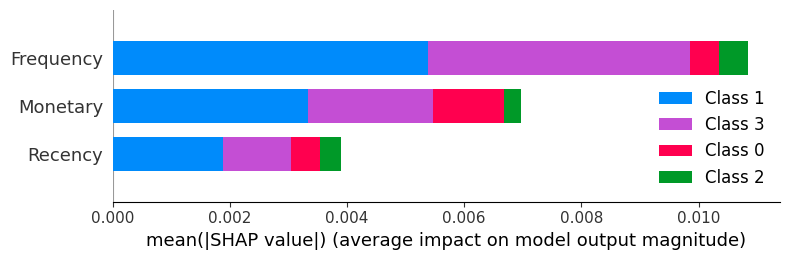

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. Choose your labels (Switch to labels_k2 if you really want the 2-cluster version)
chosen_labels = labels_k4 

# 2. Train a Surrogate Model (Random Forest) to mimic the clusters
# This tricks SHAP into working for Unsupervised data
clf = RandomForestClassifier(random_state=42)
clf.fit(rfm_scaled, chosen_labels)

# 3. Calculate SHAP Values
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(rfm_scaled)

# 4. Plot the Summary
plt.figure(figsize=(10, 6))
# Class 0 is usually the largest cluster
shap.summary_plot(shap_values, rfm_scaled, feature_names=['Recency', 'Frequency', 'Monetary'], plot_type="bar")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering

# 1. CLEAN: Remove negative values (Returns/Refunds ruin clustering)
# We only want customers who actually spent money
rfm_clean = rfm[rfm['MonetaryValue'] > 0]

# 2. TRANSFORM: Log Transform
rfm_log = np.log1p(rfm_clean[['Recency', 'Frequency', 'MonetaryValue']])

# 3. SCALE: Use RobustScaler
# RobustScaler looks at the IQR (middle 50%) and ignores the extreme outliers
scaler = RobustScaler()
rfm_scaled_robust = scaler.fit_transform(rfm_log)

# 4. MODEL: Force 'Ward' Linkage
# We stop using Optuna. We use 'ward' because it forces clusters to be spherical and balanced.
model = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
labels = model.fit_predict(rfm_scaled_robust)

# 5. CHECK COUNTS
print("--- Final Cluster Counts (Should be Balanced) ---")
print(pd.Series(labels).value_counts().sort_index())

--- Final Cluster Counts (Should be Balanced) ---
0    1646
1    1397
2     341
3     954
Name: count, dtype: int64


In [ ]:
# 1. Assign labels to the CLEAN dataframe
rfm_clean['Cluster'] = labels

# 2. Calculate the averages
cluster_summary = rfm_clean.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'CustomerID': 'count'
}).round(2)

print("--- Cluster Profiles (Who are they?) ---")
display(cluster_summary)

--- Cluster Profiles (Who are they?) ---


/tmp/ipykernel_5222/3726874804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Cluster'] = labels


,Recency,Frequency,MonetaryValue,CustomerID
Cluster,,,,
0,90.10,2.00,562.95,1646
1,41.43,5.20,2189.18,1397
2,10.88,20.41,13901.34,341
3,200.77,1.08,195.11,954


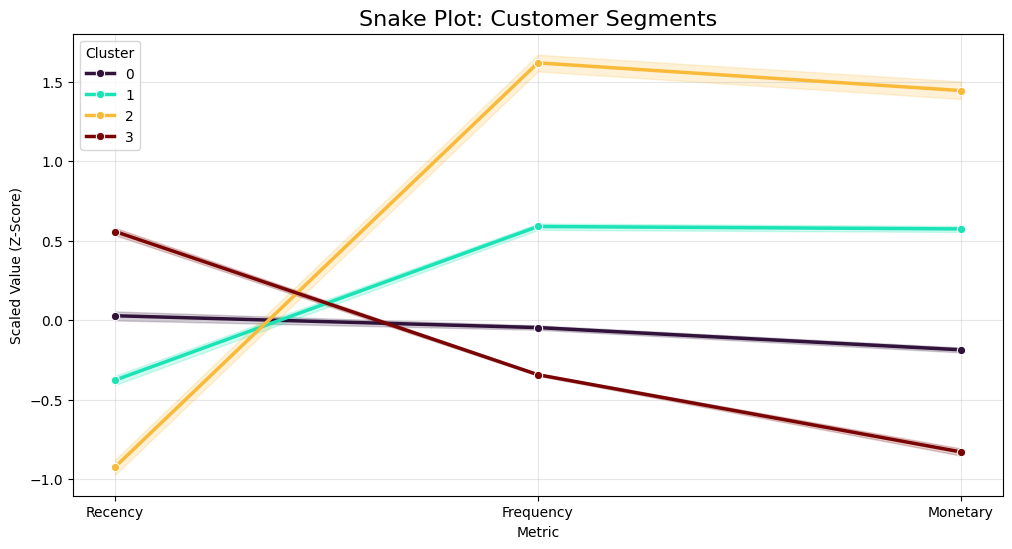

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare data for plotting
# We use the scaled data to make the lines comparable
df_plot = pd.DataFrame(rfm_scaled_robust, columns=['Recency', 'Frequency', 'Monetary'])
df_plot['Cluster'] = labels
df_plot['CustomerID'] = rfm_clean.index  # Add ID back for melting

# 2. Melt for Seaborn
df_melted = pd.melt(df_plot, id_vars=['CustomerID', 'Cluster'], 
                    value_vars=['Recency', 'Frequency', 'Monetary'],
                    var_name='Metric', value_name='Value')

# 3. Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Metric', y='Value', hue='Cluster', data=df_melted, palette='turbo', marker='o', linewidth=2.5)

plt.title('Snake Plot: Customer Segments', fontsize=16)
plt.ylabel('Scaled Value (Z-Score)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# 1. Define the Naming Dictionary
segment_names = {
    2: 'Champions',
    1: 'Loyal Customers',
    0: 'Hibernating',
    3: 'Lost/Low Value'
}

# 2. Map the names to a new column
rfm_clean['Segment'] = rfm_clean['Cluster'].map(segment_names)

# 3. View the final result
print(rfm_clean[['Recency', 'Frequency', 'MonetaryValue', 'Segment']].head())

# 4. Save to CSV (Ready for PowerBI/Tableau or a Report)
rfm_clean.to_csv('Customer_Segmentation_Results.csv')
print("File 'Customer_Segmentation_Results.csv' saved successfully!")

            Recency  Frequency  MonetaryValue          Segment
CustomerID                                                    
0               326          1       77183.60  Loyal Customers
1                 2          7        4310.00  Loyal Customers
2                75          4        1797.24  Loyal Customers
3                19          1        1757.55  Loyal Customers
4               310          1         334.40   Lost/Low Value
File 'Customer_Segmentation_Results.csv' saved successfully!


/tmp/ipykernel_5222/1899901281.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_clean['Segment'] = rfm_clean['Cluster'].map(segment_names)


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Prepare the RFM Data again (if 'rfm_clean' is loaded)
# If rfm_clean is not loaded, reload it:
# rfm_clean = pd.read_csv('Customer_Segmentation_Results.csv')
# rfm_clean.set_index('CustomerID', inplace=True)

# Select only the numeric columns for scaling
rfm_data = rfm_clean[['Recency', 'Frequency', 'MonetaryValue']]

# 2. Scale the data (DBSCAN is very sensitive to scaling)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# 3. Run DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(rfm_scaled)

# 4. Check the Counts
print("--- DBSCAN Cluster Counts ---")
print(pd.Series(db_labels).value_counts())

--- DBSCAN Cluster Counts ---
 0    4297
-1      41
Name: count, dtype: int64


In [20]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# --- 1. LOAD DATA ---
df_trans = pd.read_excel('Online Retail.xlsx')

# --- 2. PREPARE THE BASKET ---
# Filter out cancellations
df_clean = df_trans[~df_trans['InvoiceNo'].str.contains('C', na=False)]

# Create the basket
basket = (df_clean.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# FIX MEMORY ISSUE 1: Convert to Boolean (True/False) instead of 0/1
# This saves huge amounts of memory and removes the DeprecationWarning
basket_sets = (basket > 0).astype(bool)

if 'POSTAGE' in basket_sets.columns: 
    basket_sets.drop('POSTAGE', inplace=True, axis=1)

print(f"Basket Shape: {basket_sets.shape}")

# --- 3. RUN FP-GROWTH (The Efficient Algorithm) ---
# FIX MEMORY ISSUE 2: Use fpgrowth instead of apriori
print("Running FP-Growth...")
frequent_itemsets = fpgrowth(basket_sets, min_support=0.01, use_colnames=True)

# --- 4. GENERATE RULES ---
if frequent_itemsets.empty:
    print("⚠️ No patterns found at 1%.")
else:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # --- 5. SHOW RESULTS ---
    print("\n✅ Market Basket Analysis Successful!")
    print("Top 5 Product Bundles (Sorted by Lift):")
    
    # We filter for high confidence (> 50%) to show the best ones
    top_rules = rules[rules['confidence'] > 0.5].sort_values('lift', ascending=False)
    display(top_rules[['antecedents', 'consequents', 'lift', 'confidence']].head(5))

Basket Shape: (20610, 4206)
Running FP-Growth...

✅ Market Basket Analysis Successful!
Top 5 Product Bundles (Sorted by Lift):


,antecedents,consequents,lift,confidence
1303,(HERB MARKER THYME),(HERB MARKER ROSEMARY),80.077532,0.932489
1302,(HERB MARKER ROSEMARY),(HERB MARKER THYME),80.077532,0.920833
1305,(HERB MARKER THYME),(HERB MARKER PARSLEY),77.827359,0.898734
1304,(HERB MARKER PARSLEY),(HERB MARKER THYME),77.827359,0.894958
1297,(HERB MARKER ROSEMARY),(HERB MARKER PARSLEY),77.576155,0.895833


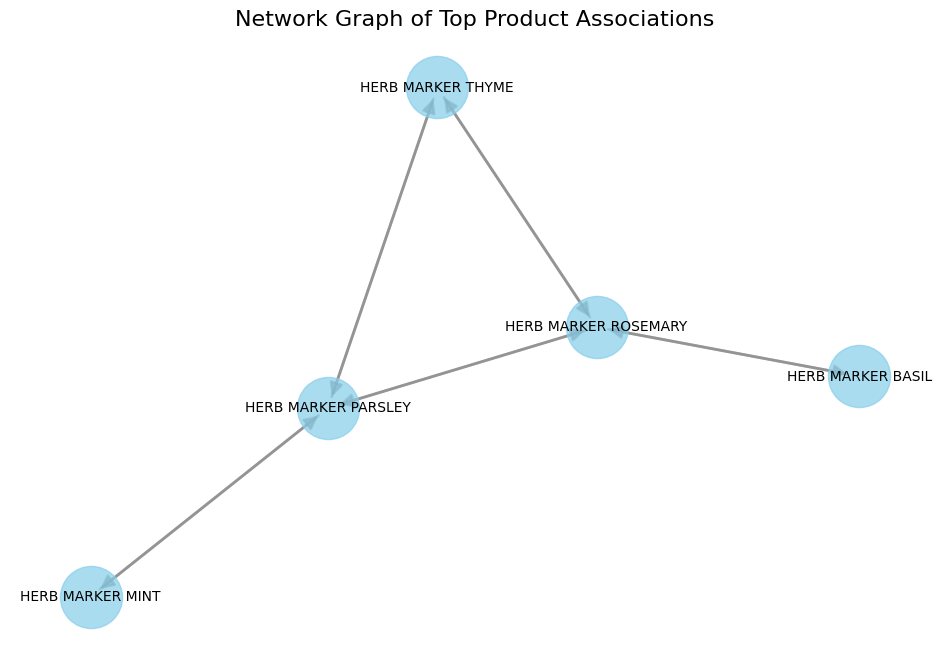

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare Data
# We select the top 10 rules to keep the graph readable
# We treat 'antecedents' and 'consequents' as strings for the graph
top_rules_plot = top_rules.head(10).copy()
top_rules_plot['antecedents'] = top_rules_plot['antecedents'].apply(lambda x: list(x)[0])
top_rules_plot['consequents'] = top_rules_plot['consequents'].apply(lambda x: list(x)[0])

# 2. Create the Graph Object
G = nx.DiGraph() # Directed Graph (Arrows)

# 3. Add Edges (Rules)
# The width of the arrow represents the "Lift" (Strength)
for i, row in top_rules_plot.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

# 4. Draw the Graph
plt.figure(figsize=(12, 8))

# Layout: 'spring_layout' positions nodes so they don't overlap
pos = nx.spring_layout(G, k=1.5, seed=42) 

# Draw Nodes (Products)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue', alpha=0.7)

# Draw Edges (Arrows)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.6, edge_color='gray', arrowsize=20)

# Draw Labels (Product Names)
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title('Network Graph of Top Product Associations', fontsize=16)
plt.axis('off') # Turn off the x/y axis numbers
plt.show()

In [22]:
import pickle

# 1. Prepare the Segmentation Data
# We only need the CustomerID and their Segment
# Reset index so CustomerID is a column, easier to save
deployment_segments = rfm_clean.reset_index()[['CustomerID', 'Segment']]

# 2. Prepare the Rules Data
# The rules currently use 'frozensets' which are hard to search in an API.
# We convert them to simple strings.
deployment_rules = rules.copy()
deployment_rules['antecedents'] = deployment_rules['antecedents'].apply(lambda x: list(x)[0])
deployment_rules['consequents'] = deployment_rules['consequents'].apply(lambda x: list(x)[0])
deployment_rules = deployment_rules[['antecedents', 'consequents', 'lift']]

# 3. Save to Pickle Files
with open('segment_model.pkl', 'wb') as f:
    pickle.dump(deployment_segments, f)

with open('rules_model.pkl', 'wb') as f:
    pickle.dump(deployment_rules, f)

print("✅ Models saved successfully as 'segment_model.pkl' and 'rules_model.pkl'")

✅ Models saved successfully as 'segment_model.pkl' and 'rules_model.pkl'
